<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


/Users/Moafdhal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


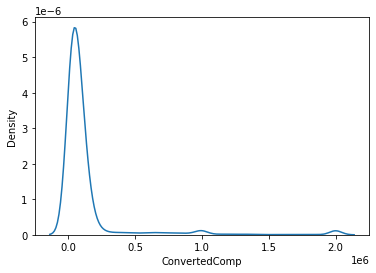

In [5]:
import seaborn as sns
ax = sns.distplot(df['ConvertedComp'], hist=False)


Plot the histogram for the column `ConvertedComp`.


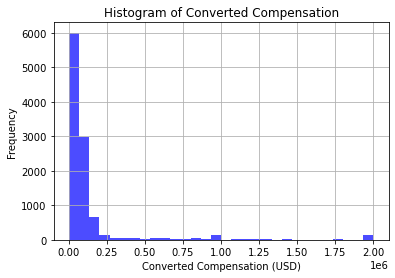

In [4]:
# your code goes here
import matplotlib.pyplot as plt

# Plot the histogram for 'ConvertedComp'
plt.hist(df['ConvertedComp'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.grid(True)
plt.show()


What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()
print("Median of ConvertedComp:", median_converted_comp)


Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
man_only_count = df[df['Gender'] == 'Man'].shape[0]
print("Number of responders who identified themselves only as a Man:", man_only_count)


Number of responders who identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
median_converted_comp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print("Median ConvertedComp of responders who identified themselves only as a Woman:", median_converted_comp_woman)


Median ConvertedComp of responders who identified themselves only as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
# Calculate the five-number summary for the 'Age' column
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()

# Display the five-number summary
print("Minimum Age:", min_age)
print("Q1 (First Quartile) Age:", q1_age)
print("Median Age:", median_age)
print("Q3 (Third Quartile) Age:", q3_age)
print("Maximum Age:", max_age)


Minimum Age: 16.0
Q1 (First Quartile) Age: 25.0
Median Age: 29.0
Q3 (Third Quartile) Age: 35.0
Maximum Age: 99.0


Plot a histogram of the column `Age`.


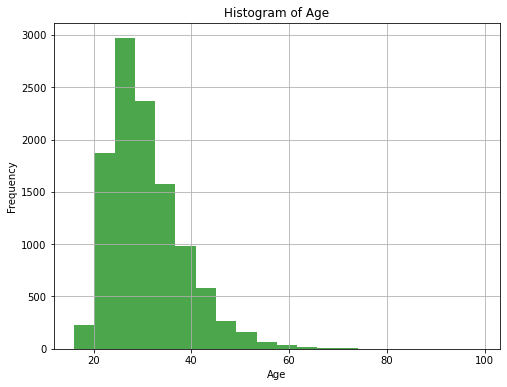

In [10]:
# your code goes here
import matplotlib.pyplot as plt

# Plot the histogram for 'Age'
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='green', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.grid(True)
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


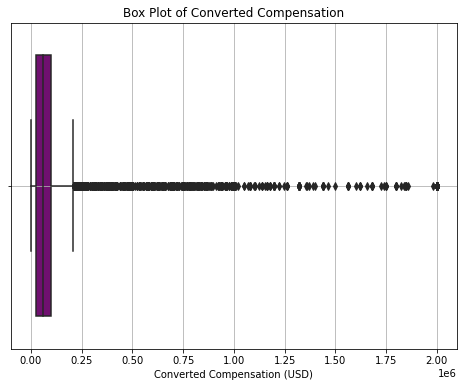

In [11]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for 'ConvertedComp'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ConvertedComp'], color='purple')
plt.xlabel('Converted Compensation (USD)')
plt.title('Box Plot of Converted Compensation')
plt.grid(True)
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# your code goes here
# Calculate the Interquartile Range (IQR) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for ConvertedComp:", IQR)


Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [13]:
# your code goes here
# Calculate the Interquartile Range (IQR) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)


Lower Bound for Outliers: -82830.0
Upper Bound for Outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# your code goes here
# Calculate the lower and upper bounds for outliers
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print("Number of outliers in the ConvertedComp column:", num_outliers)


Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [16]:
# your code goes here
# Calculate the lower and upper bounds for outliers
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the shape of the new DataFrame
print("Shape of the DataFrame without outliers:", df_no_outliers.shape)


Shape of the DataFrame without outliers: (9703, 85)


In [18]:
# Calculate the mean and median of 'ConvertedComp' after removing outliers
mean_without_outliers = df_no_outliers['ConvertedComp'].mean()
median_without_outliers = df_no_outliers['ConvertedComp'].median()

print("Mean 'ConvertedComp' after removing outliers:", mean_without_outliers)
print("Median 'ConvertedComp' after removing outliers:", median_without_outliers)


Mean 'ConvertedComp' after removing outliers: 59883.20838915799
Median 'ConvertedComp' after removing outliers: 52704.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [17]:
# your code goes here
# Calculate the correlation between 'Age' and all other numerical columns
age_corr = df.corr()['Age']

# Print the correlation values
print("Correlation between Age and other numerical columns:")
print(age_corr)


Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
